In [1]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
import lssutils.dataviz as dv
from lssutils.utils import EbossCat, nside2pixarea, hpix2radec, shiftra
import healpy as hp

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import fitsio as ft

import pandas as pd

In [2]:
nside = 256
pix_area = nside2pixarea(nside, degrees=True)
nran_bar = pix_area*5000. # 5000 per sq deg

path_cats = '/home/mehdi/data/eboss/data/v7_2/3.0/catalogs/'
print(path_cats)

# nn
dNGC = EbossCat(f'{path_cats}eBOSS_QSO_full_NGC_known_mainhighz_512_v7_2.dat.fits', zmin=0.8, zmax=3.5)
rNGC = EbossCat(f'{path_cats}eBOSS_QSO_full_NGC_known_mainhighz_512_v7_2.ran.fits', kind='randoms', zmin=0.8, zmax=3.5)
dSGC = EbossCat(f'{path_cats}eBOSS_QSO_full_SGC_known_mainhighz_512_v7_2.dat.fits', zmin=0.8, zmax=3.5)
rSGC = EbossCat(f'{path_cats}eBOSS_QSO_full_SGC_known_mainhighz_512_v7_2.ran.fits', kind='randoms', zmin=0.8, zmax=3.5)

ngal_ngc = dNGC.to_hp(nside, 0.8, 3.5, raw=2)
nran_ngc = rNGC.to_hp(nside, 0.8, 3.5, raw=2)
ngal_sgc = dSGC.to_hp(nside, 0.8, 3.5, raw=2)
nran_sgc = rSGC.to_hp(nside, 0.8, 3.5, raw=2)
frac_ngc = nran_ngc / nran_bar
frac_sgc = nran_sgc / nran_bar
ngal_tot = ngal_ngc + ngal_sgc
frac_tot = frac_ngc + frac_sgc
ngal_dens = ngal_tot / (frac_tot * pix_area)

# standard
path_cats = '/home/mehdi/data/eboss/data/v7_2/'
dNGC = EbossCat(f'{path_cats}eBOSS_QSO_full_NGC_v7_2.dat.fits', zmin=0.8, zmax=3.5)
rNGC = EbossCat(f'{path_cats}eBOSS_QSO_full_NGC_v7_2.ran.fits', kind='randoms', zmin=0.8, zmax=3.5)
dSGC = EbossCat(f'{path_cats}eBOSS_QSO_full_SGC_v7_2.dat.fits', zmin=0.8, zmax=3.5)
rSGC = EbossCat(f'{path_cats}eBOSS_QSO_full_SGC_v7_2.ran.fits', kind='randoms', zmin=0.8, zmax=3.5)

ngal_ngc = dNGC.to_hp(nside, 0.8, 3.5, raw=2)
nran_ngc = rNGC.to_hp(nside, 0.8, 3.5, raw=2)
ngal_sgc = dSGC.to_hp(nside, 0.8, 3.5, raw=2)
nran_sgc = rSGC.to_hp(nside, 0.8, 3.5, raw=2)
frac_ngc = nran_ngc / nran_bar
frac_sgc = nran_sgc / nran_bar
ngal_tot_ = ngal_ngc + ngal_sgc
frac_tot_ = frac_ngc + frac_sgc

ngal_dens_ = ngal_tot_ / (frac_tot_ * pix_area)
dngal = ngal_dens_ - ngal_dens

# ngal_ngc_b = dNGC.to_hp(nside, 0.8, 3.5, raw=1)
# nran_ngc_b = rNGC.to_hp(nside, 0.8, 3.5, raw=1)
# ngal_sgc_b = dSGC.to_hp(nside, 0.8, 3.5, raw=1)
# nran_sgc_b = rSGC.to_hp(nside, 0.8, 3.5, raw=1)
# frac_ngc_b = nran_ngc_b / nran_bar
# frac_sgc_b = nran_sgc_b / nran_bar
# ngal_tot_b = ngal_ngc_b + ngal_sgc_b
# frac_tot_b = frac_ngc_b + frac_sgc_b
# ngal_dens_b = ngal_tot_b / (frac_tot_b * pix_area)


dt_ = pd.read_hdf('/home/mehdi/data/templates/SDSS_WISE_HI_Gaia_imageprop_nside256.h5')
depg = dt_['ebv'].values
is_good = np.isfinite(ngal_dens) & np.isfinite(ngal_dens_) & np.isfinite(depg)

/home/mehdi/data/eboss/data/v7_2/3.0/catalogs/


column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ip

In [3]:
hpix = np.argwhere(is_good).flatten()
ra, dec = hpix2radec(nside, hpix)
ra = shiftra(ra)
is_ngc = ra > 90

In [5]:
np.percentile(dngal[hpix], [5, 95])

array([ 0.        , 13.18942745])

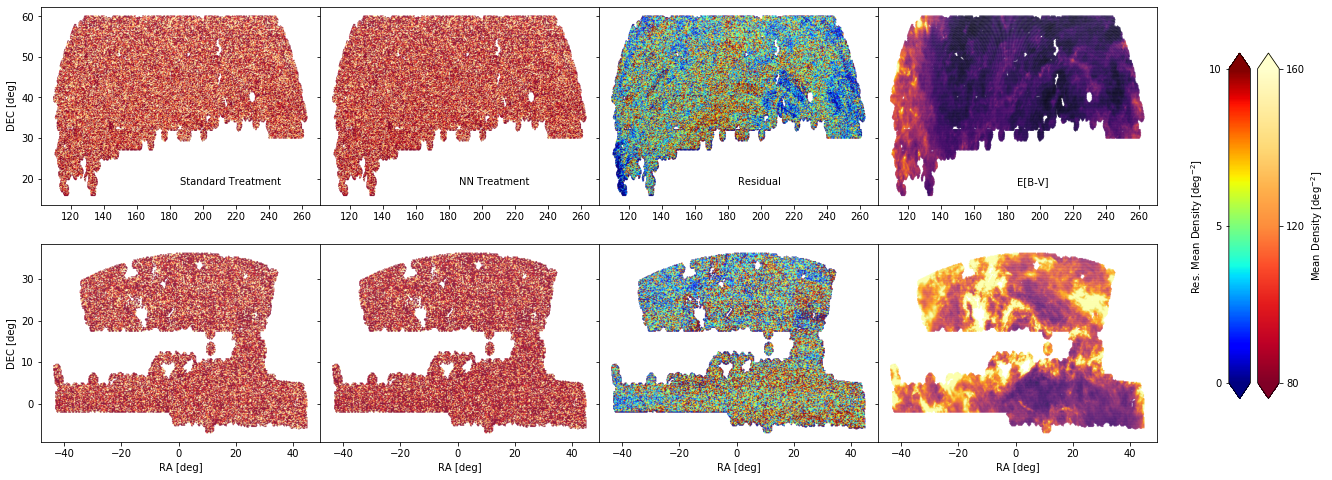

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=4, 
                       figsize=(20, 8), sharex='row', sharey='row')
fig.subplots_adjust(wspace=0.0)
ax = ax.flatten()

# density before
mp = ax[0].scatter(ra[is_ngc], dec[is_ngc], 0.1, c=ngal_dens_[hpix][is_ngc], 
                   cmap=plt.cm.YlOrRd_r, rasterized=True, vmin=80., vmax=160.)
ax[4].scatter(ra[~is_ngc], dec[~is_ngc], 0.1, c=ngal_dens_[hpix][~is_ngc], 
                   cmap=plt.cm.YlOrRd_r, rasterized=True, vmin=80., vmax=160.)

# density after
ax[1].scatter(ra[is_ngc], dec[is_ngc], 0.1, c=ngal_dens[hpix][is_ngc], 
                   cmap=plt.cm.YlOrRd_r, rasterized=True, vmin=80., vmax=160.)
ax[5].scatter(ra[~is_ngc], dec[~is_ngc], 0.1, c=ngal_dens[hpix][~is_ngc], 
                   cmap=plt.cm.YlOrRd_r, rasterized=True, vmin=80., vmax=160.)

# residual
mp1 = ax[2].scatter(ra[is_ngc], dec[is_ngc], 0.1, c=dngal[hpix][is_ngc], 
                   cmap=plt.cm.jet, rasterized=True, vmin=0., vmax=10.)
ax[6].scatter(ra[~is_ngc], dec[~is_ngc], 0.1, c=dngal[hpix][~is_ngc], 
                   cmap=plt.cm.jet, rasterized=True, vmin=0., vmax=10.)

# EBV
ax[3].scatter(ra[is_ngc], dec[is_ngc], 0.1, c=depg[hpix][is_ngc], 
                   cmap=plt.cm.inferno, rasterized=True, vmin=0., vmax=0.1)
ax[7].scatter(ra[~is_ngc], dec[~is_ngc], 0.1, c=depg[hpix][~is_ngc], 
                   cmap=plt.cm.inferno, rasterized=True, vmin=0., vmax=0.1)



cax1 = plt.axes([.97, 0.2, 0.015, 0.6])
cbar1 = fig.colorbar(mp, cax=cax1, label=r'Mean Density [deg$^{-2}$]', 
             shrink=0.7, ticks=[80., 120., 160.], extend='both')
# cbar1.set_ticks([])


cax2 = plt.axes([.95, 0.2, 0.015, 0.6])
cbar2 = fig.colorbar(mp1, cax=cax2, label=r'Res. Mean Density [deg$^{-2}$]',
             shrink=0.7, ticks=[0, 5, 10], extend='both')
cax2.yaxis.set_ticks_position('left')
cax2.yaxis.set_label_position('left')
# cbar2.set_label(label=r'N/$\overline{{\rm N}}$', size=14)


for i, label in enumerate(['Standard Treatment', 'NN Treatment', 'Residual', 'E[B-V]']):
    ax[i].text(0.5, 0.1, label, transform=ax[i].transAxes)

for i in [0, 4]:ax[i].set_ylabel('DEC [deg]')
for j in range(4, 8):ax[j].set_xlabel('RA [deg]')
    
fig.savefig('density.pdf', bbox_inches='tight', dpi=300)